In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
X_train=x_train/255
X_test=x_train/255

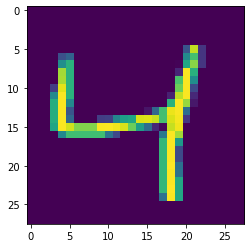

In [5]:
plt.imshow(x_train[2])

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
28*28

784

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape

In [9]:
encoder=Sequential()

encoder.add(Flatten(input_shape=[28,28]))

encoder.add(Dense(400,activation='relu'))

encoder.add(Dense(200,activation='relu'))

encoder.add(Dense(100,activation='relu'))

encoder.add(Dense(50,activation='relu'))

encoder.add(Dense(25,activation='relu'))

In [10]:
decoder=Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))

decoder.add(Dense(100,activation='relu'))

decoder.add(Dense(200,activation='relu'))

decoder.add(Dense(400,activation='relu'))

decoder.add(Dense(784,activation='sigmoid'))

decoder.add(Reshape([28,28]))

In [11]:
autodecoder=Sequential([encoder,decoder])

autodecoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
autodecoder.fit(X_train,X_train,epochs=5,validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1700 - accuracy: 0.1818 - val_loss: 0.1318 - val_accuracy: 0.2250
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1252 - accuracy: 0.2359 - val_loss: 0.1192 - val_accuracy: 0.2479
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1163 - accuracy: 0.2501 - val_loss: 0.1125 - val_accuracy: 0.2530
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1109 - accuracy: 0.2595 - val_loss: 0.1085 - val_accuracy: 0.2634
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1072 - accuracy: 0.2655 - val_loss: 0.1051 - val_accuracy: 0.2695


In [13]:
predict=autodecoder(x_test)

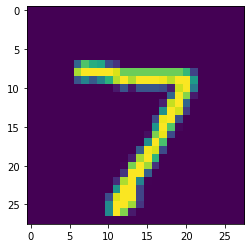

In [16]:
plt.imshow(x_test[0]) 

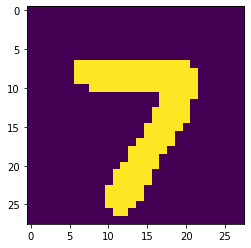

In [14]:
plt.imshow(predict[0])

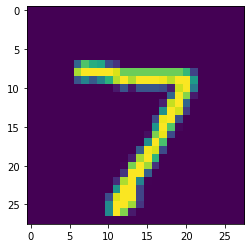

In [15]:
plt.imshow(x_test[0])

In [17]:
from tensorflow.keras.layers import GaussianNoise

In [18]:
encoder=Sequential()

encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))

encoder.add(Dense(200,activation='relu'))

encoder.add(Dense(100,activation='relu'))

encoder.add(Dense(50,activation='relu'))

encoder.add(Dense(25,activation='relu'))

In [19]:
decoder=Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))

decoder.add(Dense(100,activation='relu'))

decoder.add(Dense(200,activation='relu'))

decoder.add(Dense(400,activation='relu'))

decoder.add(Dense(784,activation='sigmoid'))

decoder.add(Reshape([28,28]))

In [21]:
denoise=Sequential([encoder,decoder])

denoise.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
denoise.fit(X_train,X_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1743 - accuracy: 0.1772
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1334 - accuracy: 0.2321
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1208 - accuracy: 0.2489
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1148 - accuracy: 0.2570
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1116 - accuracy: 0.2623


In [27]:
sample=GaussianNoise(0.2)

noisey=sample(X_test[:10],training=True)

remove_noise=denoise.predict(noisey)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



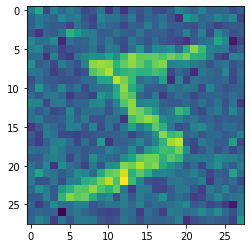

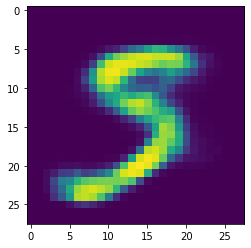

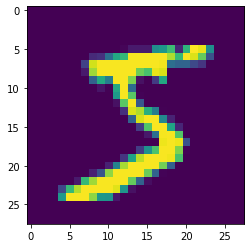

In [31]:
plt.imshow(noisey[0])
plt.show()
plt.imshow(remove_noise[0])
plt.show()
plt.imshow(X_test[0])
plt.show()
